# Task 3: Baseline Model Comparison (Neural Network)

In this notebook, you will train a simple Neural Network (MLP) to predict the `prior_hiring_decision` target variable. Compare its performance to the previous models.

In [1]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Load Data
train_df = pd.read_csv('../data/train.csv')
val_df = pd.read_csv('../data/val.csv')
test_df = pd.read_csv('../data/test.csv')

print("Training Shape:", train_df.shape)
print("Validation Shape:", val_df.shape)
print("Test Shape:", test_df.shape)

Training Shape: (30000, 13)
Validation Shape: (10000, 13)
Test Shape: (10000, 13)


## Model Training & Evaluation
**TODO:** Implement your Neural Network (MLPClassifier) pipeline here. Pay attention to data scaling.

In [2]:
# TODO: Train Neural Network and Report Accuracy + Fairness Metrics
# Create Binary 'is_white' column for Fairness Evaluation (1 = White, 0 = Non-White)
import importlib
import utils
importlib.reload(utils)

from utils import preprocess_data, fairness_metrics  # since notebook is in src/, this is correct
data, clf = preprocess_data(train_df, val_df, test_df, MLPClassifier(hidden_layer_sizes=(50,30), max_iter=500))
X_train = data['X_train']
y_train = data['y_train']
X_val = data['X_val']
y_val = data['y_val']
X_test = data['X_test']
y_test = data['y_test']
sensitive_test = data['sensitive_test']
sensitive_val = data['sensitive_val']


Using Features: ['Age', 'Workclass', 'Education', 'Marital_Status', 'Occupation', 'Relationship', 'Hours_Per_Week', 'Sex', 'Place_Of_Birth', 'interview_score', 'cv_assessment_score']
Numerical: ['Age', 'Hours_Per_Week', 'interview_score', 'cv_assessment_score']
Categorical: ['Workclass', 'Education', 'Marital_Status', 'Occupation', 'Relationship', 'Sex', 'Place_Of_Birth']


In [3]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_val)
print(y_pred)


[0 0 0 ... 0 0 0]


In [4]:
accuracy = accuracy_score(y_val, y_pred)
fairness_results, fairness_gaps = fairness_metrics(y_val, y_pred, sensitive_val, min_group_size=30)

print("Validation Accuracy:", accuracy)
for group, result in fairness_results.items():
    print(f"Group {group}")
    for metric, value in result.items():
        print(f"  {metric}: {value}")
for metric, gap in fairness_gaps.items():
    print(f"{metric} Gap: {gap}")

# Test Classifier
y_test_pred = clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_fairness_results, test_fairness_gaps = fairness_metrics(y_test, y_test_pred, sensitive_test, min_group_size=30)    
print("=== Test Results ===")
print("Test Accuracy:", test_accuracy)
for group, result in test_fairness_results.items():
    print(f"Group {group}")
    for metric, value in result.items():
        print(f"  {metric}: {value}")
for metric, gap in test_fairness_gaps.items():
    print(f"{metric} Gap: {gap}")

Validation Accuracy: 0.6407
Group 0
  n: 3756
  selection_rate_P(yhat=1|A): 0.3871139510117146
  TPR_P(yhat=1|Y=1,A): 0.5578876100203114
  FPR_P(yhat=1|Y=0,A): 0.27643703378674855
  TNR: 0.7235629662132514
  FNR: 0.44211238997968855
  TP: 824
  FP: 630
  TN: 1649
  FN: 653
Group 1
  n: 6244
  selection_rate_P(yhat=1|A): 0.5288276745675848
  TPR_P(yhat=1|Y=1,A): 0.6492178098676293
  FPR_P(yhat=1|Y=0,A): 0.3917808219178082
  TNR: 0.6082191780821918
  FNR: 0.35078219013237066
  TP: 2158
  FP: 1144
  TN: 1776
  FN: 1166
DP_gap_|P(yhat=1|A=1)-P(yhat=1|A=0)| Gap: 0.14171372355587025
EO_gap_|TPR(A=1)-TPR(A=0)| Gap: 0.09133019984731794
FPR_gap_|FPR(A=1)-FPR(A=0)| Gap: 0.11534378813105967
EOD_gap_max(TPR_gap,FPR_gap) Gap: 0.11534378813105967
=== Test Results ===
Test Accuracy: 0.6462
Group 0
  n: 3875
  selection_rate_P(yhat=1|A): 0.4
  TPR_P(yhat=1|Y=1,A): 0.5799863852961198
  FPR_P(yhat=1|Y=0,A): 0.29010806317539484
  TNR: 0.7098919368246052
  FNR: 0.4200136147038802
  TP: 852
  FP: 698
  TN:

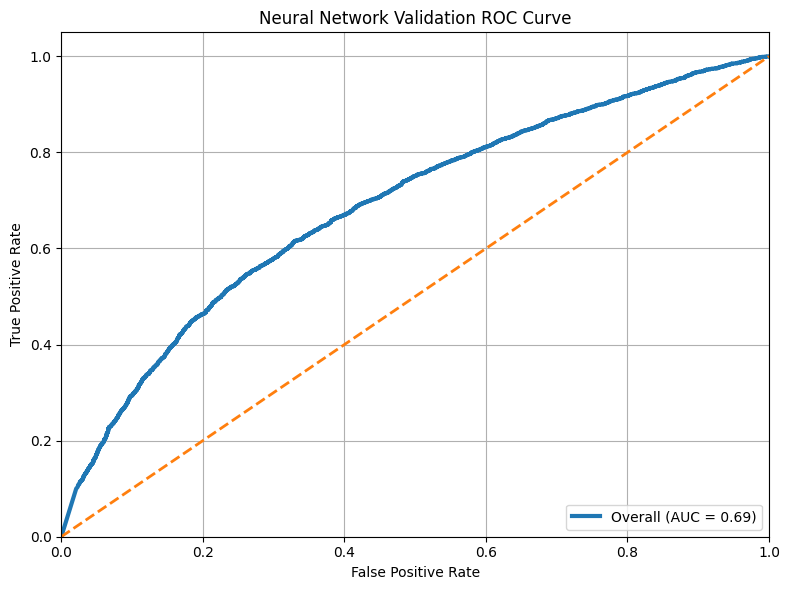

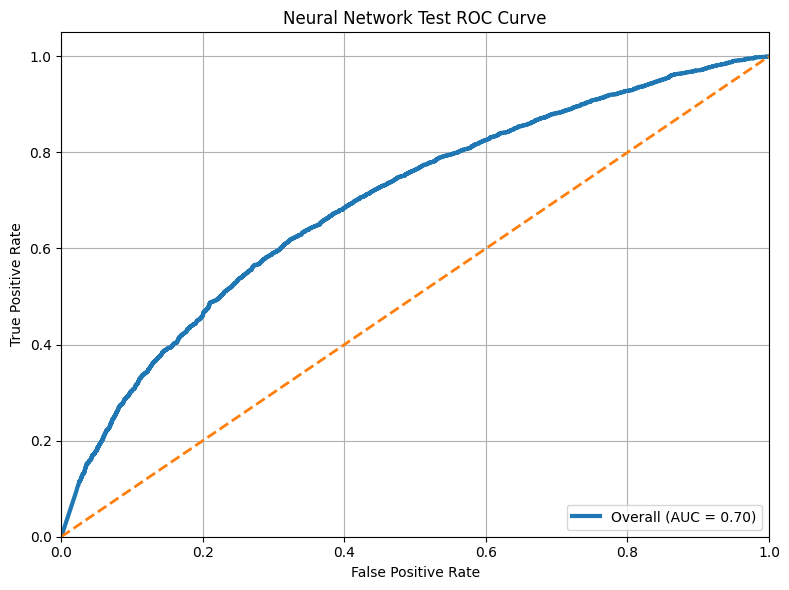

In [5]:
importlib.reload(utils)
from utils import plot_roc_curve
y_pred_proba = clf.predict_proba(X_val)[:, 1]

plot_roc_curve(y_val, y_pred_proba, title="Neural Network Validation ROC Curve")
# plot_roc_curve(y_val, y_pred_proba, sensitive_val, title="Neural Network Validation ROC Curve")

y_test_pred_proba = clf.predict_proba(X_test)[:, 1]
plot_roc_curve(y_test, y_test_pred_proba, title="Neural Network Test ROC Curve")
# plot_roc_curve(y_test, y_test_pred_proba, sensitive_test, title="Neural Network Test ROC Curve")